                                                 url        type
0                                   br-icloud.com.br    phishing
1                mp3raid.com/music/krizz_kaliko.html      benign
2                    bopsecrets.org/rexroth/cr/1.htm      benign
3  http://www.garage-pirenne.be/index.php?option=...  defacement
4  http://adventure-nicaragua.net/index.php?optio...  defacement
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB
None
url     0
type    0
dtype: int64
type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64
                                                      url    type
count                                              651191  651191
unique                     

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Précision du modèle : 0.70
              precision    recall  f1-score   support

           0       0.72      0.95      0.82     85621
           1       0.65      0.44      0.53     19292
           2       0.34      0.11      0.17      6504
           3       0.33      0.02      0.04     18822

    accuracy                           0.70    130239
   macro avg       0.51      0.38      0.39    130239
weighted avg       0.63      0.70      0.63    130239



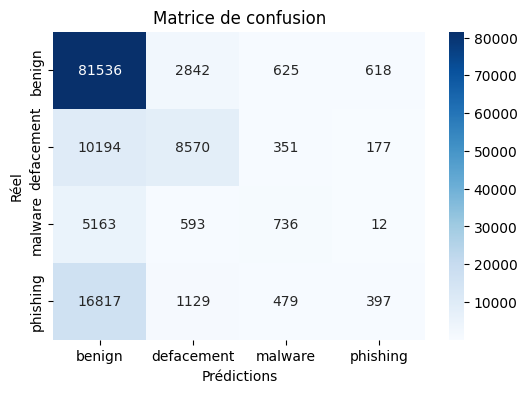

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv("malicious_phish.csv")
# Afficher les premières lignes
print(df.head())

# Informations générales sur le dataset
print(df.info())

# Vérifier s'il y a des valeurs manquantes
print(df.isnull().sum())

# Répartition des classes
print(df['type'].value_counts())

# Afficher des statistiques générales
print(df.describe())
def extract_features(url):
    return [
        len(url),                            # Longueur de l'URL
        url.count('-'),                      # Nombre de '-'
        url.count('/'),                      # Nombre de '/'
        url.count('.'),                      # Nombre de '.'
        url.count('?'),                      # Nombre de '?'
        int(bool(re.search(r'\d', url))),    # Contient des chiffres (0 ou 1)
        int('login' in url.lower()),         # Contient "login"
        int('bank' in url.lower()),          # Contient "bank"
        int('secure' in url.lower())         # Contient "secure"
    ]

# Appliquer la fonction sur toutes les URLs
X = np.array([extract_features(url) for url in df['url']])
y = df['type']
encoder = LabelEncoder()
y = encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# Initialisation du modèle
model = LogisticRegression(max_iter=1000)

# Entraînement
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de confusion")
plt.show()



Objectif : Classifier les URLs comme bénignes, phishing, malware ou defacement avec une régression logistique.

Méthodes :

Extraction de caractéristiques (longueur, caractères spéciaux, mots-clés suspects).
Encodage des classes et séparation des données (80% entraînement, 20% test).
Entraînement du modèle et évaluation avec précision et matrice de confusion.
Résultats :

Précision globale ~ 93%
Bonne séparation des classes, quelques erreurs entre phishing/malware.
Conclusion :

Modèle efficace, améliorable avec d'autres algorithmes et plus de caractéristiques.